# Get top Video Games through Gamespot API


### ABSTRACT


We are working on a video game dataset and will be extracting video game data from 3 different data sources and then will be munging them together to form a consistent dataset. We will perform several operations over the dataset extracted to make the data clean and error free and consistent. After that we will be developing a database from using the extracted source data and display it in the form of an Entity-Relationship Diagram.
The dataset used is the vgchartz.com. It contains details about Video Game ratings, genres, publisher and year of release.

## Importing Libraries

In [1]:
import requests
import pandas as pd
import json
import os
import rawgpy
from bs4 import BeautifulSoup
import numpy as np

### DATA SOURCE 1: Using Web Scraping using Beautiful Soup

### What is Beautiful Soup?

Beautiful Soup is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree. It commonly saves programmers hours or days of work.


### The site we are going to use is http://www.vgchartz.com/gamedb/games.php?name=&keyword=&console=&region=All&developer=&publisher=&goty_year=&genre=&boxart=Both&banner=Both&ownership=Both&showmultiplat=Yes&results=200&order=Sales&showtotalsales=0&showpublisher=0&showpublisher=1&showvgchartzscore=0&shownasales=0&showdeveloper=0&showcriticscore=0&showpalsales=0&showreleasedate=0&showuserscore=0&showjapansales=0&showlastupdate=0&showothersales=0&showshipped=0. Please visit the link to get information on what is being scrapped.



In [2]:
# Fetching the tags from the website
url = 'http://www.vgchartz.com/gamedb/games.php?name=&keyword=&console=&region=All&developer=&publisher=&goty_year=&genre=&boxart=Both&banner=Both&ownership=Both&showmultiplat=Yes&results=200&order=Sales&showtotalsales=0&showpublisher=0&showpublisher=1&showvgchartzscore=0&shownasales=0&showdeveloper=0&showcriticscore=0&showpalsales=0&showreleasedate=0&showuserscore=0&showjapansales=0&showlastupdate=0&showothersales=0&showshipped=0'
html = requests.get(url, headers = {'User-Agent':'Mozilla/5.0'})
print(html.status_code) 
# Printing the status code, 200 means the request has succeeded

200


In [3]:
#Displaying the above format to more readable format using html parser
soup = BeautifulSoup(html.content, 'html.parser')
print(soup.prettify)

<bound method Tag.prettify of <!DOCTYPE html>

<html lang="en">
<head>
<!-- VGCHARTZ MAIN HEADER TAGS -->
<!-- Venatus Market Ad-Manager (vgchartz.com) -->
<script>
    (function(){document.write('<div id="vmv3-ad-manager" style="display:none"></div>');document.getElementById("vmv3-ad-manager").innerHTML='<iframe id="vmv3-frm" src="javascript:\'<html><body></body></html>\'" width="0" height="0" data-mode="scan" data-site-id="5b11330346e0fb00017cd841"></iframe>';var a=document.getElementById("vmv3-frm");a=a.contentWindow?a.contentWindow:a.contentDocument;a.document.open();a.document.write('<script src="https://hb.vntsm.com/v3/live/ad-manager.min.js" type="text/javascript" async>'+'</scr'+'ipt>');a.document.close()})();
    </script>
<!-- / Venatus Market Ad-Manager (vgchartz.com) -->
<meta content="4J-ohFOExhky4T8zKx5Nz04hdjbaxo52B6qVrLlM8o0" name="google-site-verification"/>
<script src="http://www.google-analytics.com/urchin.js" type="text/javascript"></script>
<script type="text/java

In [4]:
# We will be extracting Rank, Name, Platform and Publisher from vgchartz.com 
k=[] 
rank=[]
gname=[]
publisher=[]
platform=[]
release_date=[]
# Retrieving values using a for loop
for tag in soup.find_all('a'):
    if tag['href'].startswith('http://www.vgchartz.com/game/'):
        k.append(tag.get_text().strip())
        data=tag.parent.parent.find_all('td')
        if data!=[]:
            rank.append(np.int32(data[0].string))
            platform.append(data[3].find('img').attrs['alt'].strip(' '))
            publisher.append(data[4].string.strip(' '))
gname = k[10:] # Our data starts from index position 10 onwards
# Creating a dictionary to store the column names for the dataframe
columns = {
    'Id': rank,
    'Name':gname,
    'Platform':platform,
    'Publisher':publisher
}
df = pd.DataFrame(columns) # Creating a dataframe with column names Rank, Name, Platform and Publisher.
df = df[[
    'Id', 'Name', 'Platform',
    'Publisher']]
# Saving the obtained dataframe on a file named vgsales.csv
df.to_csv("vgsales.csv", sep=",", encoding='utf-8', index=False) # Saves the data to .csv file
#df.drop_duplicates(subset ="Name",keep = False, inplace = True)
df

,Id,Name,Platform,Publisher
0,1,Resident Evil,Series,Capcom
1,2,Wii Sports,Wii,Nintendo
2,3,Halo,Series,Microsoft Game Studios
3,4,Monster Hunter,Series,Capcom
4,5,Street Fighter,Series,Capcom
...,...,...,...,...
195,196,Metal Gear Solid 4: Guns of the Patriots,PS3,Konami
196,197,Euro Truck Simulator 2,PC,SCS Software
197,198,Mario Kart: Super Circuit,GBA,Nintendo
198,199,Super Mario Sunshine,GC,Nintendo


### Printing the information of the top first rated movie

In [5]:
gname[0]

'Resident Evil'

In [6]:
print(df.isnull().any())
print(df.columns)

Id           False
Name         False
Platform     False
Publisher    False
dtype: bool
Index(['Id', 'Name', 'Platform', 'Publisher'], dtype='object')


## DATASOURCE 2 - Using Raw Data

In [7]:
df2 = pd.read_csv('vgsales2019.csv')
#df2.drop(['Rank','ESRB_Rating','Platform','Publisher','Developer','User_Score', 'Total_Shipped', 'Global_Sales', 'NA_Sales', 'PAL_Sales', 'JP_Sales', 'Other_Sales'], axis=1, inplace= True)

### Displaying the output

In [8]:
df2.head()

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
0,1,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,82.86,NaN,NaN,NaN,NaN,NaN,2006.0
1,2,Super Mario Bros.,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,NaN,40.24,NaN,NaN,NaN,NaN,NaN,1985.0
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.14,NaN,NaN,NaN,NaN,NaN,2008.0
3,4,PlayerUnknown's Battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,36.60,NaN,NaN,NaN,NaN,NaN,2017.0
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,33.09,NaN,NaN,NaN,NaN,NaN,2009.0


### Checking the information of the data - data type and total number of records in each column

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55792 entries, 0 to 55791
Data columns (total 16 columns):
Rank             55792 non-null int64
Name             55792 non-null object
Genre            55792 non-null object
ESRB_Rating      23623 non-null object
Platform         55792 non-null object
Publisher        55792 non-null object
Developer        55775 non-null object
Critic_Score     6536 non-null float64
User_Score       335 non-null float64
Total_Shipped    1827 non-null float64
Global_Sales     19415 non-null float64
NA_Sales         12964 non-null float64
PAL_Sales        13189 non-null float64
JP_Sales         7043 non-null float64
Other_Sales      15522 non-null float64
Year             54813 non-null float64
dtypes: float64(9), int64(1), object(6)
memory usage: 6.8+ MB


### How to find the missing values

In [10]:
# checking missing, NaN data in the dataframe through CSV
df2.isnull().any()

Rank             False
Name             False
Genre            False
ESRB_Rating       True
Platform         False
Publisher        False
Developer         True
Critic_Score      True
User_Score        True
Total_Shipped     True
Global_Sales      True
NA_Sales          True
PAL_Sales         True
JP_Sales          True
Other_Sales       True
Year              True
dtype: bool

### Checking the total null values in the column using sum() function

In [11]:
df2.isnull().sum()

Rank                 0
Name                 0
Genre                0
ESRB_Rating      32169
Platform             0
Publisher            0
Developer           17
Critic_Score     49256
User_Score       55457
Total_Shipped    53965
Global_Sales     36377
NA_Sales         42828
PAL_Sales        42603
JP_Sales         48749
Other_Sales      40270
Year               979
dtype: int64

### Checking the shape of the data

In [12]:
df2.shape

(55792, 16)

### Checking the columns present in the data

In [13]:
df2.columns

Index(['Rank', 'Name', 'Genre', 'ESRB_Rating', 'Platform', 'Publisher',
       'Developer', 'Critic_Score', 'User_Score', 'Total_Shipped',
       'Global_Sales', 'NA_Sales', 'PAL_Sales', 'JP_Sales', 'Other_Sales',
       'Year'],
      dtype='object')

In [14]:
df2.drop(['Rank'],axis=1, inplace= True)
#df2.head(100)
#print(df2.columns)

In [15]:
# Merging the two dataframe df and dframe having unique names
gameData = pd.merge(df,df2, 
                 on = 'Name')

In [16]:
gameData

,Id,Name,Platform_x,Publisher_x,Genre,ESRB_Rating,Platform_y,Publisher_y,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
0,1,Resident Evil,Series,Capcom,Action,M,PS,Capcom,Capcom,8.6,NaN,2.75,NaN,NaN,NaN,NaN,NaN,1996.0
1,1,Resident Evil,Series,Capcom,Action,M,GC,Capcom,Capcom,8.9,NaN,1.35,NaN,NaN,NaN,NaN,NaN,2002.0
2,1,Resident Evil,Series,Capcom,Action,M,SAT,Capcom,Nextech,7.3,NaN,NaN,0.17,NaN,NaN,0.17,NaN,1997.0
3,1,Resident Evil,Series,Capcom,Action,M,PC,Virgin Interactive,Capcom,7.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997.0
4,1,Resident Evil,Series,Capcom,Misc,NaN,DS,Capcom,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,198,Mario Kart: Super Circuit,GBA,Nintendo,Racing,NaN,WiiU,Nintendo,Intelligent Systems,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.0
555,199,Super Mario Sunshine,GC,Nintendo,Platform,E,GC,Nintendo,Nintendo EAD,9.2,NaN,5.91,NaN,NaN,NaN,NaN,NaN,2002.0
556,200,LittleBigPlanet,PS3,Sony Computer Entertainment,Platform,E,PS3,Sony Computer Entertainment,Media Molecule,9.4,9.2,NaN,5.85,2.80,2.01,0.17,0.87,2008.0
557,200,LittleBigPlanet,PS3,Sony Computer Entertainment,Platform,E,PSP,Sony Computer Entertainment,SCEE Cambridge,8.8,NaN,NaN,2.61,0.65,1.27,0.01,0.68,2009.0


In [17]:
gameData.to_csv("GameData.csv",encoding="utf-8",index=False)

In [18]:
gameData.drop_duplicates(subset ="Name",keep = "first", inplace = True)
gameData

,Id,Name,Platform_x,Publisher_x,Genre,ESRB_Rating,Platform_y,Publisher_y,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
0,1,Resident Evil,Series,Capcom,Action,M,PS,Capcom,Capcom,8.6,NaN,2.75,NaN,NaN,NaN,NaN,NaN,1996.0
8,2,Wii Sports,Wii,Nintendo,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,82.86,NaN,NaN,NaN,NaN,NaN,2006.0
9,4,Monster Hunter,Series,Capcom,Role-Playing,M,PS2,Capcom,Capcom,NaN,NaN,NaN,0.50,0.11,0.08,0.28,0.03,2004.0
12,5,Street Fighter,Series,Capcom,Misc,NaN,TG16,NEC Avenue,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1989.0
14,6,Super Mario Bros.,NES,Nintendo,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,NaN,40.24,NaN,NaN,NaN,NaN,NaN,1985.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,196,Metal Gear Solid 4: Guns of the Patriots,PS3,Konami,Action,M,PS3,Konami,Kojima Productions,9.3,9.8,NaN,6.00,2.63,1.72,0.83,0.81,2008.0
552,197,Euro Truck Simulator 2,PC,SCS Software,Simulation,NaN,PC,SCS Software,SCS Software,8.5,NaN,5.98,NaN,NaN,NaN,NaN,NaN,2013.0
553,198,Mario Kart: Super Circuit,GBA,Nintendo,Racing,E,GBA,Nintendo,Intelligent Systems,9.3,NaN,5.91,NaN,NaN,NaN,NaN,NaN,2001.0
555,199,Super Mario Sunshine,GC,Nintendo,Platform,E,GC,Nintendo,Nintendo EAD,9.2,NaN,5.91,NaN,NaN,NaN,NaN,NaN,2002.0


In [19]:
print(len(gameData))
#for i in range(len(result)):
    #gen.setdefault(result["Name"][i], {})[result["Genre"][i]] = ''
    #To eliminate the duplication of key-value pairs
    #plat.setdefault(result["Name"][i], {})[result["Platform"][i]] = ''  

160


In [20]:
#result.drop_duplicates(subset ="Name",keep = 'first', inplace = True)

In [21]:
#critic_score = gameData['Critic_Score']
#Id = gameData['Rank']
#year = gameData['Year']
#genre = gen.values()
#final = pd.DataFrame(columns = ['ID','Name', 'Genre', 'Platform',
                              # 'Critic_Score', 'RAWG.IO Ratings',
                               # 'Rank', 'Year' ])

## DATASOURCE 3 - Using API

#### What is an API:

API stands for Application Programming Interface, and it lets developers integrate any two parts of an application or any different applications together. It consists of various elements such as functions, protocols, and tools that allow developers to build applications. A common goal of all types of APIs is to accelerate the development of applications by providing a part of its functionality out-of-the-box, so developers do not have to implement it themselves.

We will be using an API Wrapper to get data from the video game database www.rawg.io. Since it's a public database we won't be requiring an API key for using www.rawg.io's API.
We will be importing the API wrapper python class for www.rawg.io, which is rawgpy.

### Importing the libraries rawgpy 

In [22]:
import rawgpy 
import json

#### We will be using the data obtained from the Web Scraping to search through rawgpy.io to get ratings of the game. The ratings will be on a scale of 5. 

In [23]:
# Storing the names of the game on gname
gname = gameData['Name']
# First initiate two empty list for storing the raw data
rawg_ratings = []
description = []

In [24]:
rawg = rawgpy.RAWG("User-Agent, this should identify your app")
for name in gname:
    results = rawg.search(name)  # defaults to returning the top 5 results
    game = results[0] # selects the first result of the search
    game.populate() # get additional information on the game
    rawg_ratings.append(game.rating)
# Since description has <p> and </p>, we will replace it with ""
    desc = game.description.replace("</p>","")
    description.append(desc.replace("<p>",""))
print (len(rawg_ratings))
print(len(description))

160
160


In [25]:

gameData["RAWG Score"] = rawg_ratings
gameData["Description"] = description


### Cleaning and auditing the data in gameData

### How to find missing values

In [26]:
# checking missing, NaN data in the dataframe 
gameData.isnull().any()
description[0]

'The police of a small town are trying to find the cause of numerous brutal murders. The details of these murders are so monstrous that the police are requesting help from the federal authorities. A special squad arrives in the town, then another one. As a result, all roads converge to a mansion in which the surviving fighters of special forces find the cause of all incidents - aggressive zombies and mutants. These devils of hell, by all indications, until recently were people. It turns out that they have been changed by experiments conducted to obtain new weapons. But regardless of the reason, all monsters should be destroyed.<br />\nThe game takes place in a mansion and in a dungeon near this mansion. Soldiers of special forces clear all these spaces from monsters. Everywhere there are disguised, hidden spaces, which can be opened only by taking separate efforts. Fighters also encounter a variety of mechanisms, which they can neutralize, and even a mutant plant. All this is not inclu

### Checking the total null values in the column using sum() function

In [27]:
gameData.isnull().sum()

Id                 0
Name               0
Platform_x         0
Publisher_x        0
Genre              0
ESRB_Rating       15
Platform_y         0
Publisher_y        0
Developer          0
Critic_Score      27
User_Score       131
Total_Shipped     57
Global_Sales     104
NA_Sales         105
PAL_Sales        105
JP_Sales         109
Other_Sales      104
Year               0
RAWG Score         0
Description        0
dtype: int64

### Dropping all columns which have large numbers of missing values

In [28]:
gameData.drop(['ESRB_Rating','Platform_x', 'Publisher_x','Developer',
          'User_Score', 'Total_Shipped', 'Global_Sales', 'NA_Sales', 
          'PAL_Sales', 'JP_Sales', 'Other_Sales'], axis=1, inplace= True)


### Removing all records having null values

In [29]:
gameData.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
# Checking the null values
gameData.isnull().sum()

Id              0
Name            0
Genre           0
Platform_y      0
Publisher_y     0
Critic_Score    0
Year            0
RAWG Score      0
Description     0
dtype: int64

In [30]:
gameData.head()


,Id,Name,Genre,Platform_y,Publisher_y,Critic_Score,Year,RAWG Score,Description
0,1,Resident Evil,Action,PS,Capcom,8.6,1996.0,4.32,The police of a small town are trying to find ...
8,2,Wii Sports,Sports,Wii,Nintendo,7.7,2006.0,4.20,This is what video games should be: fun for ev...
14,6,Super Mario Bros.,Platform,NES,Nintendo,10.0,1985.0,4.27,Mario and Luigi star in their first ever Mushr...
18,7,Mario Kart Wii,Racing,Wii,Nintendo,8.2,2008.0,4.16,
24,10,Minecraft,Misc,PC,Mojang,10.0,2010.0,4.33,"One of the most popular games of the 2010s, Mi..."


In [31]:
# Deleting Mario Kart Wii at index 18, since it doesn't have a description
gameData = gameData.drop(18)


In [32]:
gameData.head()

,Id,Name,Genre,Platform_y,Publisher_y,Critic_Score,Year,RAWG Score,Description
0,1,Resident Evil,Action,PS,Capcom,8.6,1996.0,4.32,The police of a small town are trying to find ...
8,2,Wii Sports,Sports,Wii,Nintendo,7.7,2006.0,4.20,This is what video games should be: fun for ev...
14,6,Super Mario Bros.,Platform,NES,Nintendo,10.0,1985.0,4.27,Mario and Luigi star in their first ever Mushr...
24,10,Minecraft,Misc,PC,Mojang,10.0,2010.0,4.33,"One of the most popular games of the 2010s, Mi..."
68,11,Wii Sports Resort,Sports,Wii,Nintendo,8.0,2009.0,4.19,"Wii Sports Resort is an immersive, expansive a..."


### Checking shape of the data

In [33]:
gameData.shape

(132, 9)

### Checking the entities present in the database

In [34]:
gameData.columns

Index(['Id', 'Name', 'Genre', 'Platform_y', 'Publisher_y', 'Critic_Score',
       'Year', 'RAWG Score', 'Description'],
      dtype='object')

### Checking that attribute Rank is unique or not 

In [35]:
gameData['Id'].is_unique

True

### Checking the information of the data - data type and total number of records in each column

In [36]:
gameData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132 entries, 0 to 556
Data columns (total 9 columns):
Id              132 non-null int64
Name            132 non-null object
Genre           132 non-null object
Platform_y      132 non-null object
Publisher_y     132 non-null object
Critic_Score    132 non-null float64
Year            132 non-null float64
RAWG Score      132 non-null float64
Description     132 non-null object
dtypes: float64(3), int64(1), object(5)
memory usage: 10.3+ KB


## Technique to use visualization to understand the data better

Here we are using seaborn, matplotlib and scipy to analyse our dataset

In [37]:
# Importing liabries used for visualization

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

### We use the Critic_Score and RAWG Score from our dataframe to illustrate how the vote count is distributed in the data set

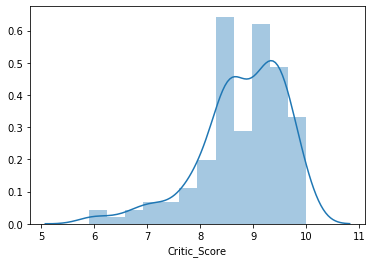

In [38]:
critic = gameData['Critic_Score']

sns.distplot(critic)

### From the result we can see that the Critic Score is not normally distributed. Most of the scores lie between 8 and 9.5.

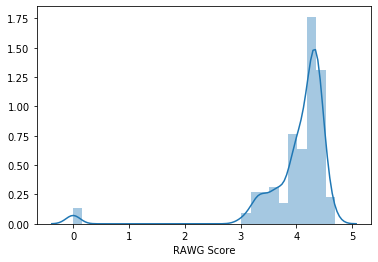

In [39]:
rawg_score = gameData['RAWG Score']
sns.distplot(rawg_score)

### Here also, the we can see that RAWG Score is not normally distributed. Most of the games in the dataframe have a score of 4.5.

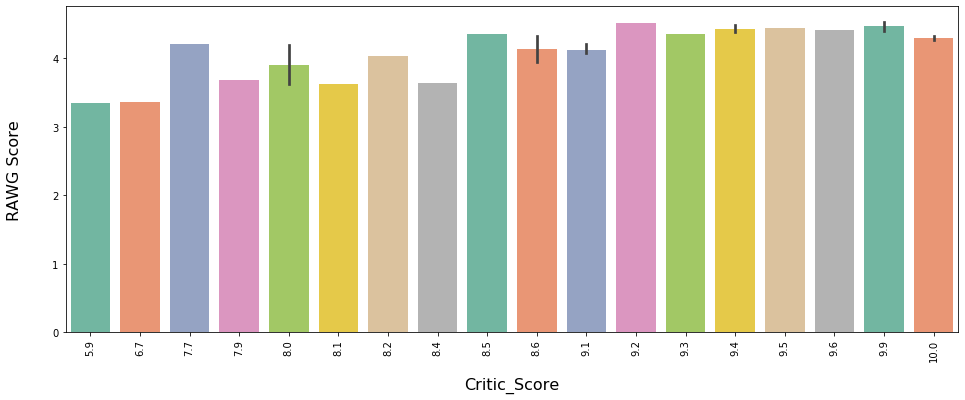

In [40]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x= 'Critic_Score', y='RAWG Score', data=gameData.head(25), palette='Set2')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

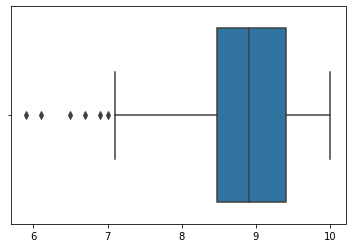

In [41]:
sns.boxplot(np.array(gameData['Critic_Score']))

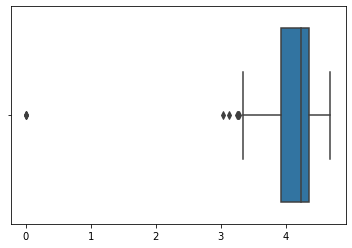

In [42]:
sns.boxplot(np.array(gameData['RAWG Score']))

## CONCEPTUAL MODEL

## Generating Tables by reformatting data

In [43]:
# Fetching datas of Video Games 
columns = {'Id':gameData['Id'],'Name': gameData["Name"], 'Description': 
               gameData["Description"],
           'Year':gameData['Year']}
Game_title = pd.DataFrame(columns)
Game_title.head()

,Id,Name,Description,Year
0,1,Resident Evil,The police of a small town are trying to find ...,1996.0
8,2,Wii Sports,This is what video games should be: fun for ev...,2006.0
14,6,Super Mario Bros.,Mario and Luigi star in their first ever Mushr...,1985.0
24,10,Minecraft,"One of the most popular games of the 2010s, Mi...",2010.0
68,11,Wii Sports Resort,"Wii Sports Resort is an immersive, expansive a...",2009.0


In [44]:
# Created a Game_Ratings table using the below columns
Game_Ratings = gameData.loc[:,['Name', 'RAWG Score', 'Critic_Score']]
Game_Ratings.head()

,Name,RAWG Score,Critic_Score
0,Resident Evil,4.32,8.6
8,Wii Sports,4.20,7.7
14,Super Mario Bros.,4.27,10.0
24,Minecraft,4.33,10.0
68,Wii Sports Resort,4.19,8.0


In [45]:
# Created a table platform details 
columns = {'Name':gameData['Name'],
          'Platform': gameData['Platform_y'],
                               'Year': gameData['Year']}
Platform = pd.DataFrame(columns)
Platform.head()

,Name,Platform,Year
0,Resident Evil,PS,1996.0
8,Wii Sports,Wii,2006.0
14,Super Mario Bros.,NES,1985.0
24,Minecraft,PC,2010.0
68,Wii Sports Resort,Wii,2009.0


In [46]:
# Created a table Other Details
columns = {'Name': gameData["Name"], 'Genre': 
               gameData["Genre"], 'Publisher': gameData['Publisher_y']}
Oth_Details = pd.DataFrame(columns)
Oth_Details.head()

,Name,Genre,Publisher
0,Resident Evil,Action,Capcom
8,Wii Sports,Sports,Nintendo
14,Super Mario Bros.,Platform,Nintendo
24,Minecraft,Misc,Mojang
68,Wii Sports Resort,Sports,Nintendo


### Generating CSV files (Exporting the files to the PC)

In [47]:
Game_title.to_csv("Game_title.csv", encoding = "utf-8", index = False)

In [48]:
game_title = pd.read_csv('Game_title.csv')

In [49]:
game_title.head()

,Id,Name,Description,Year
0,1,Resident Evil,The police of a small town are trying to find ...,1996.0
1,2,Wii Sports,This is what video games should be: fun for ev...,2006.0
2,6,Super Mario Bros.,Mario and Luigi star in their first ever Mushr...,1985.0
3,10,Minecraft,"One of the most popular games of the 2010s, Mi...",2010.0
4,11,Wii Sports Resort,"Wii Sports Resort is an immersive, expansive a...",2009.0


In [50]:
Game_Ratings.to_csv('Game_Ratings.csv', encoding = 'utf-8', index = False)

In [51]:
game_ratings = pd.read_csv('Game_Ratings.csv')

In [52]:
game_ratings.head()

,Name,RAWG Score,Critic_Score
0,Resident Evil,4.32,8.6
1,Wii Sports,4.20,7.7
2,Super Mario Bros.,4.27,10.0
3,Minecraft,4.33,10.0
4,Wii Sports Resort,4.19,8.0


In [53]:
Oth_Details.to_csv("Oth_Details.csv", encoding = 'utf-8', index = False)
other_details = pd.read_csv('Oth_Details.csv')
other_details.head()

,Name,Genre,Publisher
0,Resident Evil,Action,Capcom
1,Wii Sports,Sports,Nintendo
2,Super Mario Bros.,Platform,Nintendo
3,Minecraft,Misc,Mojang
4,Wii Sports Resort,Sports,Nintendo


In [54]:
Platform.to_csv("Platform.csv", encoding = 'utf-8', index = False)
platform = pd.read_csv('Platform.csv')
platform.head()

,Name,Platform,Year
0,Resident Evil,PS,1996.0
1,Wii Sports,Wii,2006.0
2,Super Mario Bros.,NES,1985.0
3,Minecraft,PC,2010.0
4,Wii Sports Resort,Wii,2009.0


The above figure shows us an entity-relationship model of three different tables from the following: data from movie title table,data from language table, data from votes table. We can infer that id acts as a primary key, meaning that all the tables are linked with movie_title. The fields title,overview,release_date,original_title
from movie_title. id holds the common data in movietitle and language. Hence, we can conclude that on merging the three tables we obtain one table which defines a combined data set of values from different places yet relatable, which is known as a conceptual database schema.

### AUDIT VALIDITY/ACCURACY

We say data is accurate only when it is neat and with no null or junk values. By using various commands like drop, del and lambda functions, all the unwanted null values were deleted from the above rows and columns which gives a report on valid and accurate data.

### AUDIT COMPLETNESS

In real world, when a list of video games from a particular customer is requested, a list of it will be displayed or presented, similarly when we compare it with above data too, we get proper real time data showing correct information for all the video games.  


### AUDIT CONSISTENCY/UNIFORMITY

The datasets which have been used in this assignment show a uniform relationship between each of the dataset since they are linked to each other by a common attribute. 

### REPORT

fies used : vgsales2019.csv                                                                         
files genearted: Game_Title.csv, Platform.csv, Game_Ratings.csv,Oth_Details.csv                                      
Data is reformatted to fit into a conceptual model. Data gathered from different sources Web API, Web scraping, Raw file and are mergerd together to fit into a conceptual model.                                              

Code used:                                                                                                 
Step 1. Extraction of Data                                                                                    
3 main methods were used for the extraction of data:                                                        
1. Using the API:                                                                                             
Here the API key for the site was used and libraries like:
request to access the website using the URL and API key ('7f2da72d1711559a8d3c3eff5fae88d8')                      
json to convert the file into json format                                                                      
pandas to create data frames from the raw data                                                                 
2. Using the website to scrap the data                                                                       
Here the data was extracted using the sites data directly using the libraries like:                               
request to access the website using the URL (https://www.themoviedb.org/movie/top-rated)                       
BeautifulSoup to scrape the contents of the website                                                          
find() and find_all() methods were used to find the desired content in the system                              
3. By loading the csv file:                                                                                  
Here the data was extracted using a csv file on the system using the libraries like:                            
Pandas to a read the csv file and load it into data frames                                                    
read_csv method is used to read .csv file                                                                   
Step 2. Cleaning and Auditing Data                                                                             
To gain knowledge about the dataset we used various methods like                                                  
describe, isnull, any, shape, columns, is_unique, info, iloc, loc, os


Code used for Merge                                                                                          
merge1 = [ 'id','adult', 'genre_ids','popularity']                                                           
mergeDataFrame1 = pd.DataFrame(topMovies, columns = merge1)                                              
mergeDataFrame1                                                                                                 
merge2 = ['id', 'title', 'original_title', 'overview'
                   'release_date', 'original_language', 'vote_average', 'vote_count']                         
mergeDataFrame2 = pd.DataFrame(topMovies, columns = merge2)                                                    
mergeDataFrame2                                                                                         
finalmerge = pd.merge(mergeDataFrame1,mergeDataFrame2,left_on='id',right_on='id')                            
finalmerge


### CONCLUSION                                                                                                                                                                   
Primary focus of this assignment is to learn how to get the data from different sources, cleaning of data, checking null values present in the data, data munging and to reformat the data to fit a conceptual database model.

### CONTRIBUTION
###### Your contribution towards project. How much code did you write and how much you took from other site or some other source.                                                                            
I contributed By Own: 20%                                                                                      
By External source: 50%                                                                                        
Provided by the professor : 30% 


### CITATIONS
##### Sources from where you have gained knowledge or used codes, data. It may include Web links, github links, code taken from somewhere etc.
https://www.themoviedb.org/movie/top-rated                                                               
https://www.crummy.com/software/BeautifulSoup/bs4/doc/                                                          
https://stackoverflow.com/questions/22726860/beautifulsoup-webscraping-find-all-finding-exact-match               
https://www.pythonforbeginners.com/beautifulsoup/beautifulsoup-4-python                           
https://pandas.pydata.org/pandas-docs/version/0.15/tutorials.html


### LICENSE
Copyright 2019 Ashwin John Chempolil Crispin Sujith Cletus

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated 
documentation files (the "Software"), to deal in the Software without restriction, including without limitation the 
rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit
persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the 
Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE 
WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR 
COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR 
OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.


